https://colab.research.google.com/drive/1gcUpK6gm0jRMcs7-8SsDM7Ao089O3V0b

# Building a Neural Network

In [1]:
from keras.datasets import mnist
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [0]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=1024, verbose=1)

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


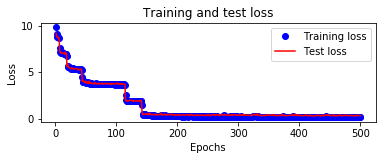

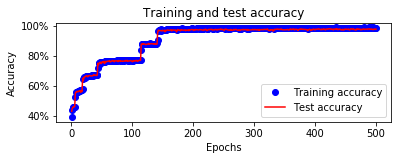

In [0]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Building a neural network with scaling

In [0]:
# num_pixels = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Commenting this out coz this is already reshaped

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# num_classes = y_test.shape[1]

# Redundant as already done in the first part

In [0]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=1024, verbose=1)

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


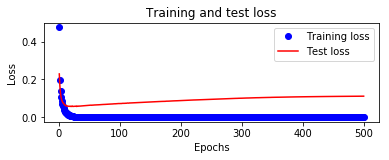

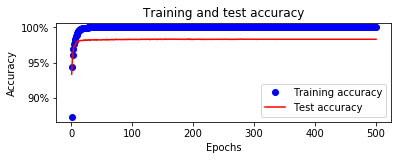

In [0]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Impact of having high number of non-zero values

In [0]:
from keras.datasets import mnist
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
28*28*X_train.shape[0]

47040000

In [0]:
X_train.flatten().shape

(47040000,)

In [0]:
X_train/=255
X_test/=255

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0, 0.5, 'Frequency of input values')

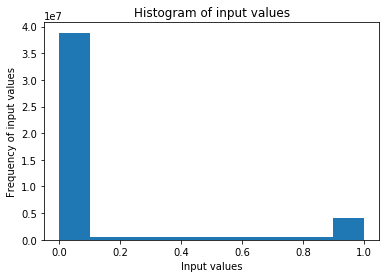

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(X_train.flatten())
plt.grid('off')
plt.title('Histogram of input values')
plt.xlabel('Input values')
plt.ylabel('Frequency of input values')

In [0]:
X_train = 1-X_train
X_test = 1-X_test

In [0]:
X_train.shape

(60000, 784)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


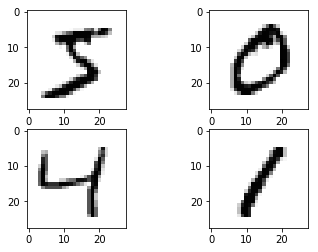

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[0].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(222)
plt.imshow(X_train[1].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(223)
plt.imshow(X_train[2].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(224)
plt.imshow(X_train[3].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0, 0.5, 'Frequency of input values')

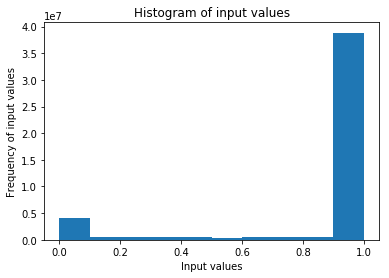

In [0]:
plt.hist(X_train.flatten())
plt.grid('off')
plt.title('Histogram of input values')
plt.xlabel('Input values')
plt.ylabel('Frequency of input values')

In [0]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


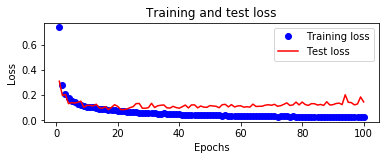

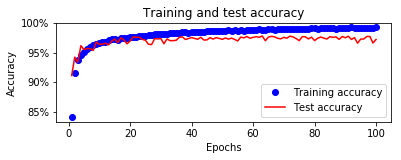

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Impact of high batch size on network learning

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train/255
X_test = X_test/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=32000, verbose=1)

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


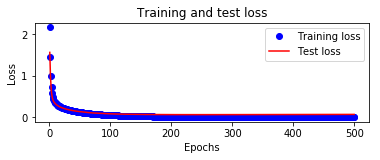

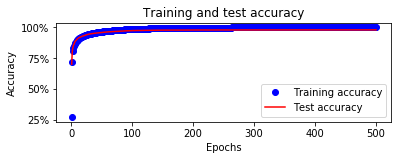

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Building a deep neural network

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train/255
X_test = X_test/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1024, verbose=1)

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


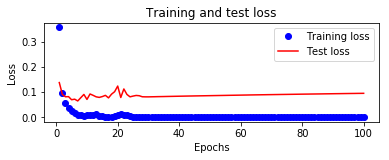

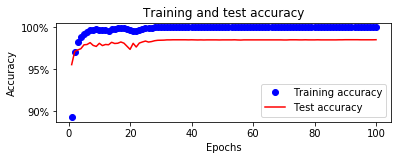

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Impact of varying learning rate on network accuracy

In [0]:
from keras.optimizers import Adam
adam = Adam(lr = 0.1)

In [0]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=1024, verbose=1)

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


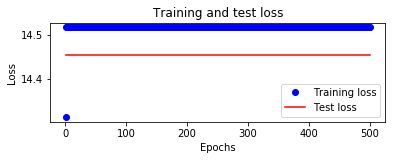

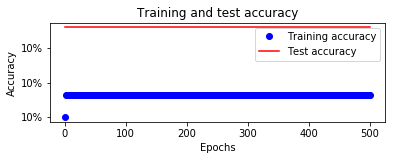

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Impact of varying optimizers on network accuracy

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train/255
X_test = X_test/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


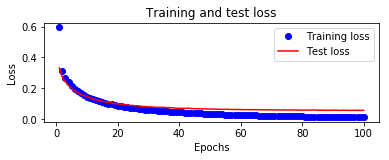

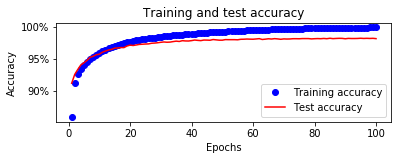

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Understanding overfitting

In [0]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.4676 - acc: 0.8734 - val_loss: 0.2222 - val_acc: 0.9369
Epoch 2/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.1949 - acc: 0.9455 - val_loss: 0.1614 - val_acc: 0.9517
Epoch 3/5
60000/60000 [==============================] - 1s 11us/step - loss: 0.1390 - acc: 0.9613 - val_loss: 0.1278 - val_acc: 0.9626
Epoch 4/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.1056 - acc: 0.9711 - val_loss: 0.1055 - val_acc: 0.9682
Epoch 5/5
60000/60000 [==============================] - 1s 11us/step - loss: 0.0842 - acc: 0.9773 - val_loss: 0.0936 - val_acc: 0.9721


In [0]:
model.weights

[<tf.Variable 'dense_23/kernel:0' shape=(784, 1000) dtype=float32_ref>,
 <tf.Variable 'dense_23/bias:0' shape=(1000,) dtype=float32_ref>,
 <tf.Variable 'dense_24/kernel:0' shape=(1000, 10) dtype=float32_ref>,
 <tf.Variable 'dense_24/bias:0' shape=(10,) dtype=float32_ref>]

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


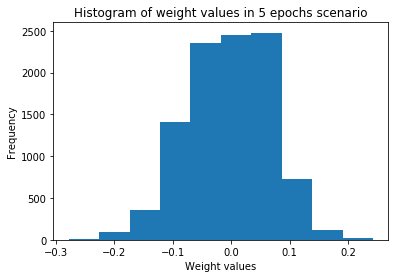

In [0]:
plt.hist(model.get_weights()[2].flatten())
plt.xlabel('Weight values')
plt.ylabel('Frequency')
plt.title('Histogram of weight values in 5 epochs scenario')
plt.grid('off')

In [0]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.4682 - acc: 0.8734 - val_loss: 0.2304 - val_acc: 0.9358
Epoch 2/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.1934 - acc: 0.9454 - val_loss: 0.1629 - val_acc: 0.9532
Epoch 3/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.1399 - acc: 0.9600 - val_loss: 0.1279 - val_acc: 0.9622
Epoch 4/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.1069 - acc: 0.9702 - val_loss: 0.1076 - val_acc: 0.9682
Epoch 5/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.0852 - acc: 0.9759 - val_loss: 0.0913 - val_acc: 0.9727
Epoch 6/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.0698 - acc: 0.9808 - val_loss: 0.0825 - val_acc: 0.9744
Epoch 7/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.0579 - acc: 0.9845 - val_loss: 0.0795 - 

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


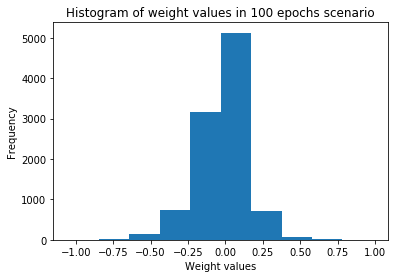

In [0]:
plt.hist(model.get_weights()[2].flatten())
plt.xlabel('Weight values')
plt.ylabel('Frequency')
plt.title('Histogram of weight values in 100 epochs scenario')
plt.grid('off')

# Adding L2 regularization to reduce overfitting

In [0]:
from keras.regularizers import l2

In [0]:
model = Sequential()
model.add(Dense(1000,input_dim=784,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(10,  activation='softmax',kernel_regularizer=l2(0.01)))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 23us/step - loss: 3.9129 - acc: 0.8463 - val_loss: 1.0551 - val_acc: 0.9055
Epoch 2/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.8343 - acc: 0.9045 - val_loss: 0.7291 - val_acc: 0.9123
Epoch 3/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.7298 - acc: 0.9083 - val_loss: 0.7010 - val_acc: 0.9142
Epoch 4/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.7203 - acc: 0.9095 - val_loss: 0.7016 - val_acc: 0.9151
Epoch 5/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.7157 - acc: 0.9094 - val_loss: 0.6994 - val_acc: 0.9104
Epoch 6/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.7106 - acc: 0.9104 - val_loss: 0.6896 - val_acc: 0.9183
Epoch 7/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.7104 - acc: 0.9101 - val_loss: 0.6887 - 

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


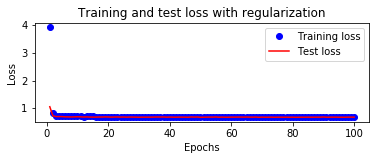

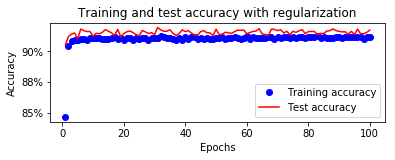

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss with regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy with regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


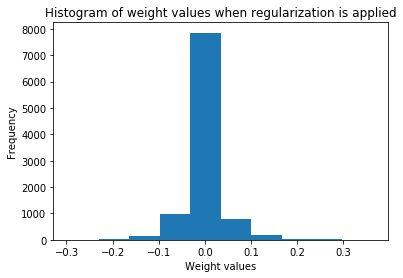

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(model.get_weights()[2].flatten())
plt.xlabel('Weight values')
plt.ylabel('Frequency')
plt.title('Histogram of weight values when regularization is applied')
plt.grid('off')

In [0]:
!ls

sample_data


# Applying dropout to reduce overfitting

In [0]:
model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.2025 - acc: 0.9394 - val_loss: 0.1041 - val_acc: 0.9692
Epoch 2/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.0983 - acc: 0.9711 - val_loss: 0.1114 - val_acc: 0.9677
Epoch 3/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.0732 - acc: 0.9782 - val_loss: 0.0968 - val_acc: 0.9745
Epoch 4/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.0573 - acc: 0.9832 - val_loss: 0.0857 - val_acc: 0.9760
Epoch 5/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0483 - acc: 0.9861 - val_loss: 0.1080 - val_acc: 0.9729
Epoch 6/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.0420 - acc: 0.9876 - val_loss: 0.1023 - val_acc: 0.9782
Epoch 7/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0368 - acc: 0.9893 - val_loss: 0.

In [0]:
model.weights

[<tf.Variable 'dense_29/kernel:0' shape=(784, 1000) dtype=float32_ref>,
 <tf.Variable 'dense_29/bias:0' shape=(1000,) dtype=float32_ref>,
 <tf.Variable 'dense_30/kernel:0' shape=(1000, 1000) dtype=float32_ref>,
 <tf.Variable 'dense_30/bias:0' shape=(1000,) dtype=float32_ref>,
 <tf.Variable 'dense_31/kernel:0' shape=(1000, 1000) dtype=float32_ref>,
 <tf.Variable 'dense_31/bias:0' shape=(1000,) dtype=float32_ref>,
 <tf.Variable 'dense_32/kernel:0' shape=(1000, 10) dtype=float32_ref>,
 <tf.Variable 'dense_32/bias:0' shape=(10,) dtype=float32_ref>]

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


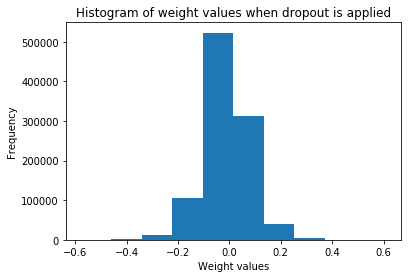

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(model.get_weights()[2].flatten())
plt.xlabel('Weight values')
plt.ylabel('Frequency')
plt.title('Histogram of weight values when dropout is applied')
plt.grid('off')

In [0]:
from keras.layers import Dropout, Activation

In [0]:
model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1024, verbose=1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.8399 - acc: 0.7322 - val_loss: 0.3070 - val_acc: 0.9169
Epoch 2/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.4106 - acc: 0.8784 - val_loss: 0.2294 - val_acc: 0.9367
Epoch 3/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.3390 - acc: 0.8995 - val_loss: 0.1964 - val_acc: 0.9431
Epoch 4/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.2951 - acc: 0.9141 - val_loss: 0.1709 - val_acc: 0.9499
Epoch 5/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.2701 - acc: 0.9206 - val_loss: 0.1547 - val_acc: 0.9549
Epoch 6/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.2488 - acc: 0.9266 - val_loss: 0.1408 - val_acc: 0.9578
Epoch 7

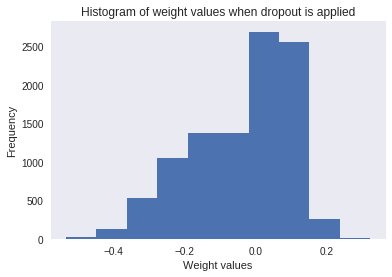

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(model.get_weights()[2].flatten())
plt.xlabel('Weight values')
plt.ylabel('Frequency')
plt.title('Histogram of weight values when dropout is applied')
plt.grid('off')

# Adding batch normalization

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

In [0]:
model = Sequential()
model.add(Dense(1000, input_dim=784,activation='relu', kernel_regularizer = l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(10,  activation='softmax', kernel_regularizer = l2(0.01)))
from keras.optimizers import Adam
#adam = Adam(lr = 0.01)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 24us/step - loss: 4.6404 - acc: 0.9066 - val_loss: 1.6588 - val_acc: 0.9614
Epoch 2/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.9260 - acc: 0.9684 - val_loss: 0.6129 - val_acc: 0.9649
Epoch 3/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.3842 - acc: 0.9740 - val_loss: 0.3612 - val_acc: 0.9671
Epoch 4/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.2642 - acc: 0.9749 - val_loss: 0.2866 - val_acc: 0.9693
Epoch 5/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.2277 - acc: 0.9758 - val_loss: 0.2517 - val_acc: 0.9666
Epoch 6/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.2127 - acc: 0.9759 - val_loss: 0.2250 - val_acc: 0.9730
Epoch 7/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.2110 - acc: 0.9754 - val_loss: 0.2284 - 

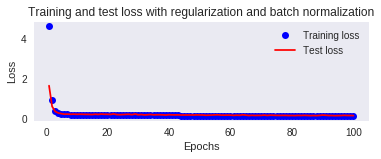

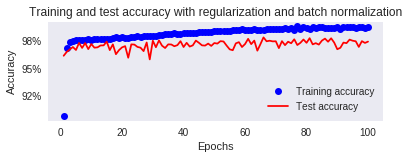

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss with regularization and batch normalization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy with regularization and batch normalization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

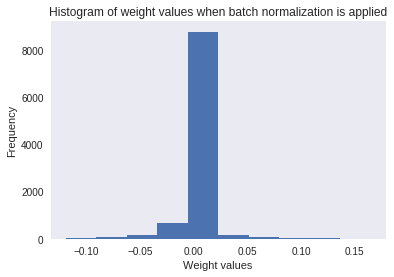

In [0]:
plt.hist(model.get_weights()[-2].flatten())
plt.xlabel('Weight values')
plt.ylabel('Frequency')
plt.title('Histogram of weight values when batch normalization is applied')
plt.grid('off')